## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [44]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [45]:
#importing ab_data.csv and examining the first few rows
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [46]:
#Using .shape to find the dimensions of the dataset
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [47]:
#finding the number of unique values per column
df.nunique('index')

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [48]:
#Use .mean() to find the proportion of converted users
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [49]:
#Use queries to find the number of rows where the treatment group is sent to the old page
df_treatment = df.query('group == "treatment"')
tr_old = df_treatment.query('landing_page == "old_page"')
tr_old.shape

(1965, 5)

In [50]:
#now doing th opposite, finding the number of rows where the control group is sent to the new page
df_control = df.query('group == "control"')
ctrl_new = df_control.query('landing_page == "new_page"')
ctrl_new.shape

(1928, 5)

In [51]:
#adding the two values together gives us the total number of rows where
#treatment and new_page don't match
1965+1928

3893

f. Do any of the rows have missing values?

In [52]:
#Use .isnull() to find any missing values
#no missing values found
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [53]:
#create new df that only has rows where treatment matches new_page and
#control matches old_page
df_trt_new = df_treatment.query('landing_page == "new_page"')
df_ctrl_old = df_control.query('landing_page == "old_page"')
df2 = df_trt_new.append(df_ctrl_old)

In [54]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [55]:
#finding number of unique values in dataframe
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [56]:
#Finding duplicate user_id
pd.concat(g for _, g in df2.groupby("user_id") if len(g) > 1)

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [57]:
#shown above

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [58]:
#removing the duplicate user_id row
df2 = df2.drop(df2.index[2893])

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [59]:
#finding the proportion of individuals converted regardless of page
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [60]:
#finding the conversion probability of the control group
df2_control = df2.query('group == "control"')
df2_control.converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [61]:
#finding the conversion probability of the treatment group
df2_treatment = df2.query('group == "treatment"')
df2_treatment.converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [62]:
#count of individuals who recieved new page
df2.landing_page.value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [63]:
#count of individuals total
df2.shape

(290584, 5)

In [64]:
#calculating the proportion or probability
145310 / 290584

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

Based on the results above, I don't think there is sufficient evidence that the new page leads to more conversions than the old page. In fact, the new page (11.8%) technically underperforms compared to the old page (12%)

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$p_{old}$**= The old page has the better conversion rate

**$p_{new}$**= The new page has a better conversion rate at a type 1 error rate of 5%

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [65]:
#compute conversion rate for new page
conv_new = df2_treatment.query('converted == "1"').user_id.nunique() / df2_treatment.query('converted == "0"').user_id.nunique()

#display conversion rate
conv_new

0.13482759967199032

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [66]:
#compute conversion rate for old page
conv_old = df2_control.query('converted == "1"').user_id.nunique() / df2_control.query('converted == "0"').user_id.nunique()

#display conversion rate
conv_old

0.13686269906483547

c. What is $n_{new}$, the number of individuals in the treatment group?

In [67]:
# number of individuals in the treatment group
n_new = df2_treatment.user_id.nunique()
n_new

145309

d. What is $n_{old}$, the number of individuals in the control group?

In [68]:
# number of individuals in the control group
n_old = df2_control.user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [69]:
#simulating transactions for new page
new_page_converted = df2_treatment.sample(n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [70]:
#simulating transactions for old page
old_page_converted = df2_control.sample(n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [71]:
#calculating p values and subtracting old from new
p_new = new_page_converted.query('converted == "1"').user_id.nunique() / new_page_converted.query('converted == "0"').user_id.nunique()
p_old = old_page_converted.query('converted == "1"').user_id.nunique() / old_page_converted.query('converted == "0"').user_id.nunique()
p_diff_act = p_new - p_old
p_diff_act

-0.002034046414184143

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [72]:
p_diffs = []

for _ in range(10000):
    new_page_converted = df2_treatment.sample(n_new, replace = True)
    old_page_converted = df2_control.sample(n_old, replace = True)
    p_new2 = new_page_converted.query('converted == "1"').user_id.nunique() / new_page_converted.query('converted == "0"').user_id.nunique()
    p_old2 = old_page_converted.query('converted == "1"').user_id.nunique() / old_page_converted.query('converted == "0"').user_id.nunique()
    p_diff = p_new2 - p_old2
    #appending
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

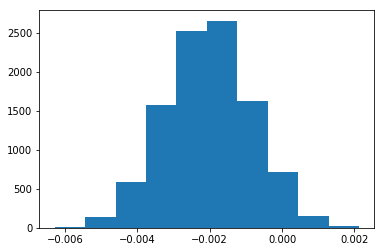

In [73]:
#converting to numpy array
p_diffs = np.array(p_diffs)

#plotting the histogram
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [74]:
#Calculating the proportion using .mean()
prop_diffs = (p_diffs > p_diff_act).mean()
prop_diffs

0.50190000000000001

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j I computed the proportion of differences in p-values from the sampling distribution that were greater than the actual difference in p-values observed in the calculations from the dataset. This value would show whether our bootstrapped sample data had similar results in p-values for the data. Since our proportion is nearly 50%, we know that the calculated difference in p-values is close to the mean, confirming the accuracy of our p_values calculated from the dataset originally**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [75]:
import statsmodels.api as sm

convert_old = df2_control.query('converted == "1"').user_id.nunique()
convert_new = df2_treatment.query('converted == "1"').user_id.nunique()
n_old = df2_control.user_id.nunique()
n_new = df2_treatment.user_id.nunique()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [76]:
#https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html
sm.stats.proportions_ztest(convert_new, n_new, value=prop_diffs, alternative='two-sided', prop_var=False)

(-451.32441383473076, 0.0)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score and p-value computed here would mean that the conversion rate of the new page is well below the mean, which disagrees with the findings from j and k**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [77]:
#checking df2 again to see current data structure
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [78]:
#Add intercept
df2['intercept'] = 1
#Getting dummy variables for the 'group' category, changing the name of the column that we'll keep
df2[['ab_page', 'B']] = pd.get_dummies(df2['group'])
#Dropping one of the dummy columns
df2.drop(columns=['B'], axis=1, inplace=True)
#Checking df2 structure again
df2.tail(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,1
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,1
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,1
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,1
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [79]:
#Creating the regression model using statsmodels
lm = sm.OLS(df2['converted'], df2[['intercept', 'ab_page']])

In [80]:
#Creating a results variable that fits the regression model
results = lm.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [81]:
#Summary of the regression model results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Thu, 10 Oct 2019   Prob (F-statistic):              0.190
Time:                        17:42:19   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1188      0.001    139.570      0.000       0.117       0.120
ab_page        0.0016      0.001      1.311      0.190      -0.001       0.004
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page is 0.190. This is different than the value found in part 2 because in this model we used an intercept as a baseline, instead of having the old_page be the null hypothesis**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It may be a good idea to add other factors to the regression model, because the group that an individual is in is probably not the only factor in whether they convert or not. Adding more factors can help show more details on which ones are influential. However, the more factors that are added, the more the results between them may be muddied. Multicollinearity may come into play as the variables in the model influence one another**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [82]:
#reading in the countries data
dfc = pd.read_csv('countries.csv')
dfc.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [83]:
#Checking the number of unique values in the countries column
dfc.nunique()

user_id    290584
country         3
dtype: int64

In [84]:
#creating the combined dataframe
df_combined = df2.join(dfc, lsuffix="_ab", rsuffix="_countries")
df_combined.head()

,user_id_ab,timestamp,group,landing_page,converted,intercept,ab_page,user_id_countries,country
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,822059.0,UK
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,711597.0,UK
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,811617.0,US
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,887018.0,US
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,820683.0,US


In [88]:
#checking data types
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 2 to 294476
Data columns (total 9 columns):
user_id_ab           290584 non-null int64
timestamp            290584 non-null object
group                290584 non-null object
landing_page         290584 non-null object
converted            290584 non-null int64
intercept            290584 non-null int64
ab_page              290584 non-null uint8
user_id_countries    286742 non-null float64
country              286742 non-null object
dtypes: float64(1), int64(3), object(4), uint8(1)
memory usage: 30.2+ MB


In [92]:
#dropping NAN values from user_id_countries column
df_combined = df_combined.dropna(subset=['user_id_countries'])

In [93]:
#converting the user_id_countries values to ints
df_combined['user_id_countries'] = df_combined['user_id_countries'].astype(int)

In [94]:
#rechecking data types after changes
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286742 entries, 2 to 290583
Data columns (total 9 columns):
user_id_ab           286742 non-null int64
timestamp            286742 non-null object
group                286742 non-null object
landing_page         286742 non-null object
converted            286742 non-null int64
intercept            286742 non-null int64
ab_page              286742 non-null uint8
user_id_countries    286742 non-null int64
country              286742 non-null object
dtypes: int64(4), object(4), uint8(1)
memory usage: 20.0+ MB


In [95]:
#get dummy variables for the countries
df_combined[['CA', 'UK', 'US']] = pd.get_dummies(df_combined['country'])
df_combined.tail()

,user_id_ab,timestamp,group,landing_page,converted,intercept,ab_page,user_id_countries,country,CA,UK,US
290575,721866,2017-01-13 20:11:07.656349,control,old_page,0,1,1,757673,UK,0,1,0
290577,668044,2017-01-03 11:23:30.266503,control,old_page,0,1,1,659679,US,0,0,1
290581,742628,2017-01-02 18:22:24.635607,control,old_page,0,1,1,799368,UK,0,1,0
290582,876990,2017-01-05 16:52:40.196611,control,old_page,0,1,1,655535,CA,1,0,0
290583,823143,2017-01-07 14:30:08.008594,control,old_page,0,1,1,934996,UK,0,1,0


In [ ]:
#dropping the last column of the dummies
df_combined.drop(columns=['US'], axis=1, inplace=True)

In [98]:
#checking df
df_combined.tail()

,user_id_ab,timestamp,group,landing_page,converted,intercept,ab_page,user_id_countries,country,CA,UK
290575,721866,2017-01-13 20:11:07.656349,control,old_page,0,1,1,757673,UK,0,1
290577,668044,2017-01-03 11:23:30.266503,control,old_page,0,1,1,659679,US,0,0
290581,742628,2017-01-02 18:22:24.635607,control,old_page,0,1,1,799368,UK,0,1
290582,876990,2017-01-05 16:52:40.196611,control,old_page,0,1,1,655535,CA,1,0
290583,823143,2017-01-07 14:30:08.008594,control,old_page,0,1,1,934996,UK,0,1


In [99]:
#create new regression model using countries data
lm2 = sm.OLS(df_combined['converted'], df_combined[['intercept', 'CA', 'UK']])

In [101]:
#summarizing results
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6489
Date:                Thu, 10 Oct 2019   Prob (F-statistic):              0.523
Time:                        18:12:28   Log-Likelihood:                -84160.
No. Observations:              286742   AIC:                         1.683e+05
Df Residuals:                  286739   BIC:                         1.684e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1196      0.001    165.184      0.000       0.118       0.121
CA            -0.0027      0.003     -0.968      0.333      -0.008       0.003
UK             0.0007      0.001      0.468      0.640      -0.002       0.003
==============================================================================
Omnibus:                   123873.244   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           408664.710
Skew:                           2.344   Prob(JB):                         0.00
Kurtosis:                       6.496   Cond. No.                         4.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Looking at these results, it looks like country does have an impact on conversion**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [102]:
#create new model using country and group data
lm3 = sm.OLS(df_combined['converted'], df_combined[['intercept', 'ab_page', 'CA', 'UK']])

In [103]:
#Showing the results of our combined model
results3 = lm3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.063
Date:                Thu, 10 Oct 2019   Prob (F-statistic):              0.363
Time:                        18:27:16   Log-Likelihood:                -84159.
No. Observations:              286742   AIC:                         1.683e+05
Df Residuals:                  286738   BIC:                         1.684e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1188      0.001    125.882      0.000       0.117       0.121
ab_page        0.0017      0.001      1.376      0.169      -0.001       0.004
CA            -0.0027      0.003     -0.967      0.333      -0.008       0.003
UK             0.0007      0.001      0.463      0.643      -0.002       0.003
==============================================================================
Omnibus:                   123871.914   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           408655.699
Skew:                           2.344   Prob(JB):                         0.00
Kurtosis:                       6.496   Cond. No.                         5.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Looking at this model, it is apparent that the page shown to the user is more of a factor than the country in which that user is visiting from**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])